### Data Analysis and Visualizations

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the CLEANED DataFrame
df_clean = pd.read_pickle('../data/cleaned_df.pkl')  # Load as df_clean
print("✅ Cleaned DataFrame loaded successfully!")
print(f"Shape: {df_clean.shape}")
print(f"Columns: {list(df_clean.columns)}")

✅ Cleaned DataFrame loaded successfully!
Shape: (406829, 12)
Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Year', 'Month', 'DayOfWeek', 'TotalAmount']


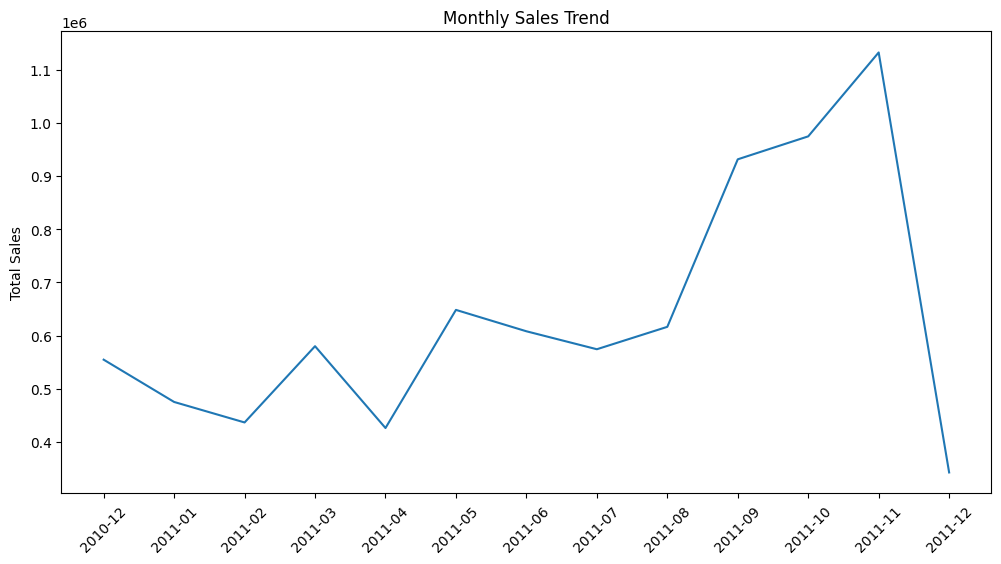

In [18]:
# Monthly sales trend
monthly_sales = df_clean.groupby(['Year', 'Month'])['TotalAmount'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['TotalAmount'])
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')

plt.savefig('../visualizations/monthly_sales_trend.png', dpi=300, bbox_inches='tight')
plt.show()

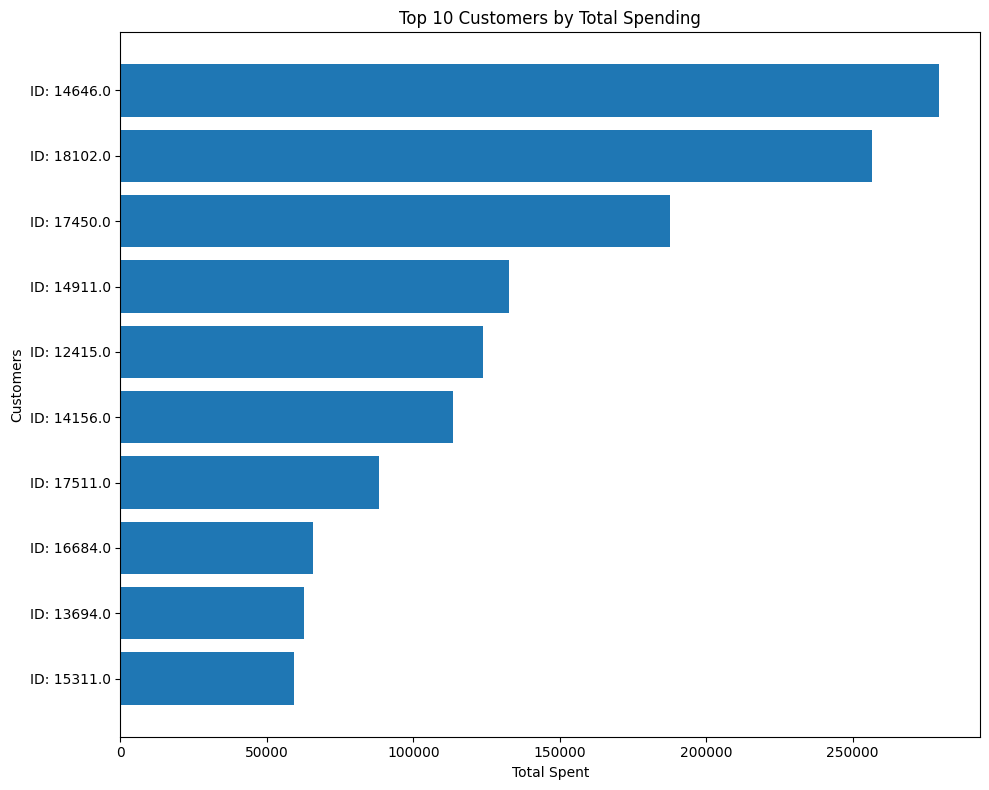

In [21]:
# Customer purchase behavior
customer_stats = df_clean.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of orders
    'TotalAmount': ['sum', 'mean'],  # Total and average spending
    'Quantity': 'sum'  # Total items bought
}).round(2)

customer_stats.columns = ['Orders', 'Total_Spent', 'Avg_Order_Value', 'Total_Items']
customer_stats = customer_stats.reset_index()

# Top 10 customers
top_customers = customer_stats.nlargest(10, 'Total_Spent')

# Tabular Data
# print("Top 10 Customers by Total Spending:")
# print(top_customers)

# Horizontal Bar Chart
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_customers)), top_customers['Total_Spent'])
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Spent')
plt.ylabel('Customers')
plt.yticks(range(len(top_customers)), [f'ID: {id}' for id in top_customers['CustomerID']])
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.savefig('../visualizations/top_customers_horizontal.png', dpi=300, bbox_inches='tight')
plt.show()

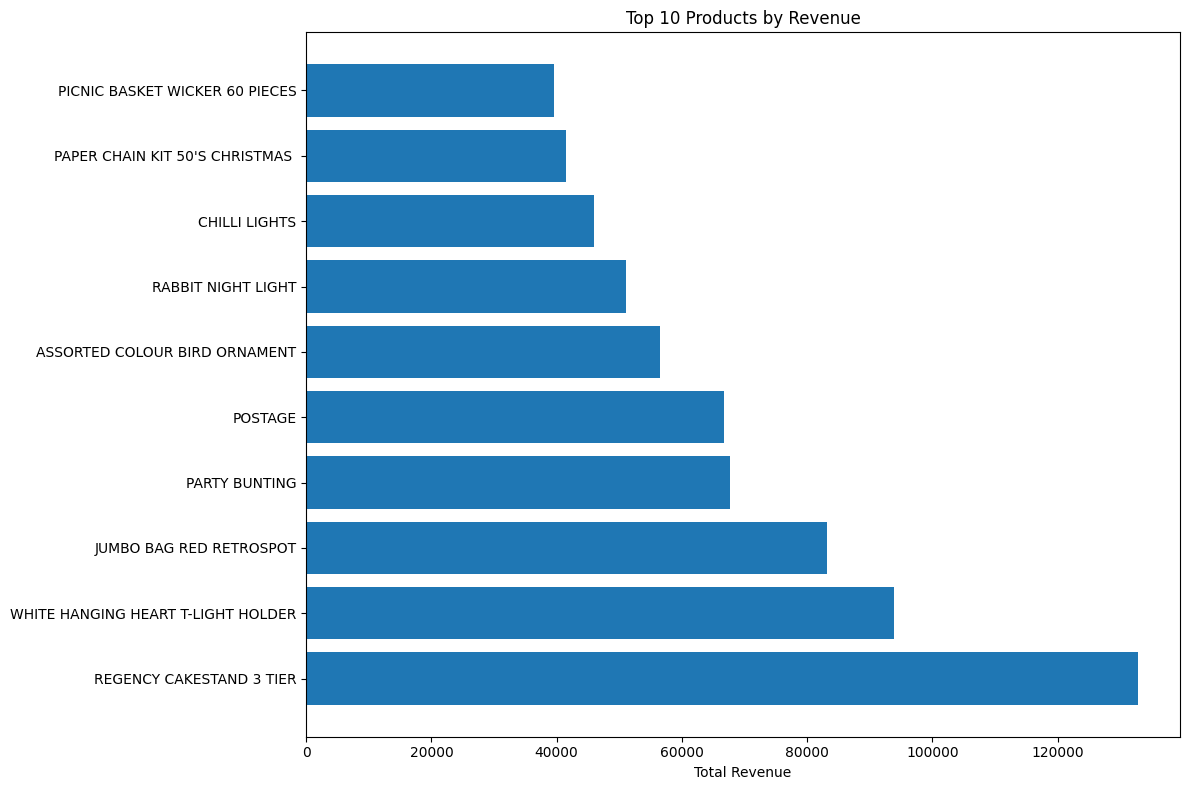

In [20]:
# Top selling products
product_sales = df_clean.groupby('Description').agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum'
}).sort_values('TotalAmount', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(product_sales.index, product_sales['TotalAmount'])
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.tight_layout()

plt.savefig('../visualizations/top_10_products_by_revenue.png', dpi=300, bbox_inches='tight')
plt.show()